In [24]:
#@title Imports
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import requests
from random import randint, choice, shuffle, seed, sample

letters = "$abcdefghijklmnopqrstuvwxyz_"

# Process data

I have a website, so I figured I could put the text file there and use the requests module to request it

I am using British Roads for this, see below:

In [25]:
url = "http://www.aayanarish.com/ml_datasets/british_roads.txt"

In [26]:
txt = requests.get(url).text.splitlines()
shuffle(txt)

In [27]:
# now, find frequencies of words

cnt = defaultdict(int)
lettercnt = defaultdict(int)
for word in txt:
    cnt[f"${word[0]}"] += 1
    cnt[f"{word[-1]}$"] += 1
    lettercnt["$"] += 2
    for i in range(len(word)-1):
        lettercnt[word[i]] += 1
        cnt[word[i:i+2]] += 1
    lettercnt[word[-1]] += 1


# Display Data

In [28]:
print(len(letters), " Tokens: \'", letters, "\'", sep="")
print("Number of words:", len(txt))
print("Sample words:")
print(*txt[:15], sep="\n")

28 Tokens: '$abcdefghijklmnopqrstuvwxyz_'
Number of words: 95439
Sample words:
culham_close
lime_avenue
southfield_mount
teulon_close
luxted_road
north_cliff_road
chestnut_road
eastwell_close
weir_hall_avenue
onslow_close
willow_garth_lane
cherry_view
nunhead_grove
crossfield_road
charnwood_street


matrix of bigram frequencies, + a 3d plot display

the code is a little messy but it works

       $      a      b      c      d      e      f      g      h      i      j      k      l      m      n      o      p      q      r      s      t      u      v      w      x      y      z      _      
$      0   4690   9953   9487   3565   2946   3488   4286   6992    751    783   2156   5167   6007   2417   2002   4532    365   4654   8341   4522    481    977   6573      1    262     41      0 
a     79     17    886   6886  23405    112    332   1293    139   1952     16   1219  10300   4066  13930      6    984     10  17335   3551   4428    775   8332   1199    265   6347    293   2267 
b      8   3488    410      7     62   4177      5      5     18   1016      0      1   1008      6      6   2286      0      0   4489    138     36   2548      0     45      0    993      0    147 
c      1   2945      7    114     13   8273      7      5   5459    411      0   3909  13295      7      5   7248      0      7   5390      8    456    494      0      1      0    157      2    214 


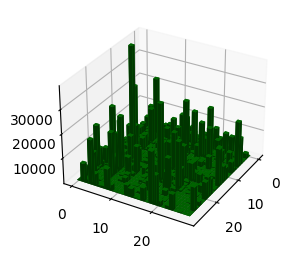

In [29]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111, projection='3d')

print("       ", end="")
for x in letters:
    print(x, end="      ")
print()

grid = []
for i in range(len(letters)):
    print(letters[i], end=" ")
    l = []
    for j in range(len(letters)):
        count = cnt[letters[i] + letters[j]]
        l.append(np.sqrt(count+1))
        print("{:6d}".format(count), end=" ")
        ax.bar3d(i, j, 1, 1, 1, count, shade=True, color="green")
    grid.append(l)
    print()
ax.view_init(elev=30, azim=30)


matrix of bigram probabilities

In [30]:
print("       ", end="")
for x in letters:
    print(x, end="      ")
print()

total = defaultdict(int)
for l1 in letters:
    for l2 in letters:
        total[l1] += cnt[l1 + l2]

for i in range(len(letters)):
    print(letters[i], end="  ")
    if total[letters[i]] == 0:
        for j in range(len(letters)):
            print("{:.4f} ".format(0)[1:], end=" ")
    else:    
        for j in range(len(letters)):
            count = cnt[letters[i] + letters[j]] / total[letters[i]]
            print("{:.4f} ".format(count)[1:], end=" ")
    print()


       $      a      b      c      d      e      f      g      h      i      j      k      l      m      n      o      p      q      r      s      t      u      v      w      x      y      z      _      
$  .0000  .0491  .1043  .0994  .0374  .0309  .0365  .0449  .0733  .0079  .0082  .0226  .0541  .0629  .0253  .0210  .0475  .0038  .0488  .0874  .0474  .0050  .0102  .0689  .0000  .0027  .0004  .0000  
a  .0007  .0002  .0080  .0624  .2120  .0010  .0030  .0117  .0013  .0177  .0001  .0110  .0933  .0368  .1262  .0001  .0089  .0001  .1570  .0322  .0401  .0070  .0755  .0109  .0024  .0575  .0027  .0205  
b  .0004  .1669  .0196  .0003  .0030  .1999  .0002  .0002  .0009  .0486  .0000  .0000  .0482  .0003  .0003  .1094  .0000  .0000  .2148  .0066  .0017  .1219  .0000  .0022  .0000  .0475  .0000  .0070  
c  .0000  .0608  .0001  .0024  .0003  .1708  .0001  .0001  .1127  .0085  .0000  .0807  .2745  .0001  .0001  .1497  .0000  .0001  .1113  .0002  .0094  .0102  .0000  .0000  .0000  .0032  .0000  .004

heatmap view of the square root of the bigram frequencies

if I didn't square root, the large outliers (such as $s, a string starting with s) would make the normal differences impossible to view

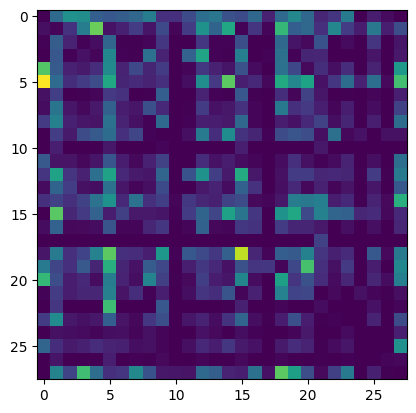

In [31]:
plt.imshow(grid)

Distribution of letter frequencies

<BarContainer object of 28 artists>

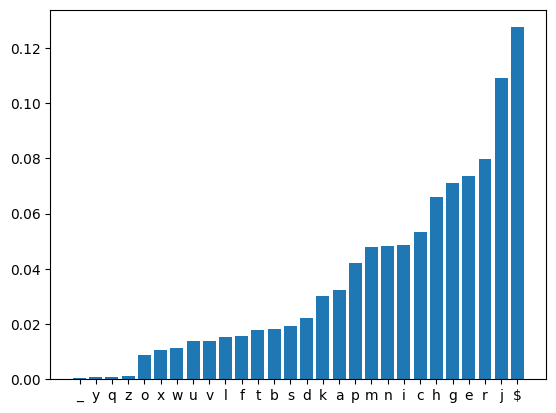

In [32]:
xs = np.array(list(letters))
ys = np.array(list(lettercnt.values()))
rgs = np.argsort(ys)
sm = np.sum(ys)
ys = ys / sm
plt.bar(xs[rgs], ys[rgs])

Entropy!

In [33]:
print(f"e^({-np.sum(ys * np.log(ys))}) = {pow(np.e, -np.sum(ys * np.log(ys)))}")

e^(2.9265458968955027) = 18.663054919588447


# Model Class

In [34]:
def get_token_dict(tokens):
    '''
    given a list of tokens, returns a dict of token to index in the array
    '''
    token_dct = {}
    for i in range(len(tokens)):
        token_dct[tokens[i]] = i
    return token_dct

I made an abstract class which RandomWriter subclasses, in case in the future we make different text models but reuse the same testing architechture.

It's probably pointless, but theres no harm in doing so.

In [35]:
class Model:
    '''
    abstract class for different prediction models, 
    so I can reuse test code with no changes
    '''
    def __init__(self, tokens):
        '''
        tokens is a list of tokens in order. They will be represented as numbers, and the tokens[i] is the token that the number i represents
        '''
        self.tokens = tokens
        self.token_dct = get_token_dict(tokens)
        
    def train(self, words):
        '''
        Trains the model using the given words  
        words: a list of words to train on
        '''
        pass

    def predict(self, block):
        '''
        Should return a token probability distribution for a given block of tokens
        block: the block to predict on
        '''
        pass

    def predict_next_token(self, word:str):
        pass

    def evaluate(self, words):
        pass

In [36]:
class RandomWriter(Model):
    '''
    Sample Model Class

    uses the RandomWriter approach of predicting a letter based on its frequency in the given data
    '''
    def __init__(self, tokens, block_size=2, rng_seed=None, reg_val=0.0001):
        super().__init__(tokens)
        self.block_size = block_size
        self.mat = np.zeros([len(tokens)]*(block_size+1), dtype=np.int32) + reg_val
        if (rng_seed):
            self.rng = np.random.default_rng(rng_seed)
        else:
            self.rng = np.random.default_rng()
    
    def tokenize(self, word):
        return tuple([self.token_dct[i] for i in word])
    
    def trim(self, word):
        # trim a word down. 
        if len(word) > self.block_size:
            word = word[-self.block_size:]
        if len(word) < self.block_size:
            word = word.rjust(self.block_size, "$") # credit to jasper for telling me about this function
        return word
    
    def pad(self, word):
        return ("$"*(self.block_size)) + word + "$"
    
    def train(self, wordlist):
        for word in wordlist:
            w = self.pad(word)
            for i in range(len(w)-self.block_size):
                block = w[i:i+self.block_size+1]
                block = [self.token_dct[i] for i in block]
                self.mat[tuple(block)] += 1

    def predict(self, block):
        if (np.sum(block) == 0):
            return np.ones((len(self.tokens)))/len(self.tokens)
        return self.mat[block]/np.sum(self.mat[block])
    
    def predict_next_token(self, word):
        word = self.trim(word)
        block = tuple([self.token_dct[i] for i in word])
        return self.tokens[self.rng.choice(len(self.tokens), p=self.predict(block))]

    def evaluate_primitive(self, words):
        cases = 0
        correct = 0
        for word in words:
            wrd = self.pad(word)
            for x in range(len(wrd)-self.block_size-1):
                w = wrd[x:x+self.block_size]
                t2 = self.predict_next_token(w)
                if(t2 == wrd[x+self.block_size]):
                    correct += 1
                cases += 1
        return correct/cases
    
    def evaluate(self, words):
        ans = np.zeros((len(words)))
        ind = 0
        for word in words:
            wrd = self.pad(word)
            prob = 0
            for x in range(len(wrd)-self.block_size-1):
                w = wrd[x:x+self.block_size]
                t2 = self.predict(self.tokenize(w))
                # print(self.tokenize(wrd[x+self.block_size]))
                prob -= np.log(t2[self.tokenize(wrd[x+self.block_size])[0]])
            ans[ind] = prob/(len(wrd)-self.block_size-1)
            ind += 1
        return np.mean(ans)



# Playing with Model

In [37]:
model = RandomWriter(list(letters), block_size=3)
model.train(txt)

In [38]:
# predict on: $ab
model.predict((0, 1, 2))

array([3.47218846e-07, 6.94472415e-03, 5.72911444e-01, 3.47218846e-07,
       1.04169126e-02, 2.49997917e-01, 3.47218846e-07, 3.47218846e-07,
       3.47218846e-07, 7.98606819e-02, 3.47218846e-07, 3.47218846e-07,
       1.04169126e-02, 3.47218846e-07, 1.04169126e-02, 1.38891011e-02,
       3.47218846e-07, 3.47218846e-07, 3.47222319e-02, 3.47253568e-03,
       3.47218846e-07, 3.47218846e-07, 3.47218846e-07, 3.47218846e-07,
       3.47218846e-07, 6.94472415e-03, 3.47218846e-07, 3.47218846e-07])

In [39]:
# starting string
w = "thom"

# generate more and more data until stopping
while w[-1] != "$":
    w += model.predict_next_token(w)
    print(w)

thom_
thom_r
thom_ro
thom_roa
thom_road
thom_road$


# Testing Model

In [40]:
# CREDIT: JASPER
# split dataset into train and test
def train_test_split(words, train_frac = 0.8, rng_seed=18):
    words = list(words)
    seed(rng_seed)
    shuffle(words)
    split_idx = int(len(words) * train_frac)
    return words[:split_idx], words[split_idx:]

split into train and test

In [41]:
train_words, test_words = train_test_split(txt)
print("Training:", len(train_words), "Testing:", len(test_words))
print("\nSome Train", *train_words[:10], "\nSome Test", *test_words[:10], sep="\n")

Training: 76351 Testing: 19088

Some Train
wortley_hall_close
stone_hall_mews
barclay_close
centenary_street
falloden_way
west_walk
godetia_close
peter_salem_road
portland_rise
woodbridge_court

Some Test
duck_lees_lane
hayfield_close
kirklinton_drive
chislehurst_avenue
beeton_way
haversham_close
cantlow_road
keswick_mews
tangent_link
oyster_row


Hyperparameter tuning time!

In [42]:
def hyperParamTune(train_data, block_sizes, regularizations, runs=10):
    '''
    hyperparameter tuning for model
    '''
    average = defaultdict(int)
    params = []
    for run in range(runs):
        train, val = train_test_split(train_data)
        for b in block_sizes:
            for r in regularizations:
                model = RandomWriter(letters, block_size=b, reg_val=r)
                model.train(train)
                prob = model.evaluate(val)
                average[(b, r)] += prob
    params = [(i[0], i[1]/runs) for i in average.items()]
    params.sort(key = lambda x: x[-1])
    return params



Before you say that my space of looking for regularization values is too small, I looked in a larger space first and narrowed my search to find a minimum manually. It would take way too long to run it with every possible regularization value, as that would range from `0.0001` to `0.1`.

In [43]:
print(*hyperParamTune(train_words, [3, 4, 5], [0.035, 0.0375, 0.04, 0.0425, 0.045], runs=1), sep="\n")

((4, 0.04), 1.3017951355794724)
((4, 0.0375), 1.3018024380401252)
((4, 0.0425), 1.3018651222592534)
((4, 0.035), 1.3018999254774957)
((4, 0.045), 1.3020018248409329)
((5, 0.035), 1.3200775364370545)
((5, 0.0375), 1.320840246770867)
((5, 0.04), 1.3217060569678765)
((5, 0.0425), 1.322657983317083)
((5, 0.045), 1.3236822307516933)
((3, 0.045), 1.4284953627192758)
((3, 0.0425), 1.4286779710852517)
((3, 0.04), 1.4288913549758686)
((3, 0.0375), 1.4291397918621025)
((3, 0.035), 1.4294284627260418)


Results on test with "optimal" hyperpameters

In [44]:
b_size = 4
reg = 0.04
model = RandomWriter(list(letters), block_size=b_size, reg_val=reg)
model.train(train_words)

Entropy!

In [45]:
prob = model.evaluate(test_words)
print(f"e^{prob} = {pow(np.e, prob)}")

e^1.2928869226543565 = 3.643289282544582


Some real results on test data, it is quite bad

In [46]:
sampl = sample(test_words, 10)
for word in sampl:
    pref = word[:b_size]
    while pref[-1] != "$":
        pref += model.predict_next_token(w)
    print("Actual:", word, (" "*(25-len(word))), "|| Predicted:", pref)

Actual: grimsel_path               || Predicted: grimrkvmqxvjfpphwioh_fogaqyzywrfwsbbhszakcrn__xcpxelqyck$
Actual: wilberforce_close          || Predicted: wilbfyrlji_zztliexaoxomtr_gglpiedivjijgiucqncayqgcolddj_qlhrve$
Actual: gauntlett_road             || Predicted: gaunyoxmbyzx$
Actual: swanbourne_drive           || Predicted: swanyepx$
Actual: holt_drive                 || Predicted: holtwskimskynftu$
Actual: lancaster_mews             || Predicted: lancldodjrvvvzxzuzkqqkgqxaaxzwdhegfwgvwjjzdakvbt_mspx_wdklt$
Actual: st_alban_crescent          || Predicted: st_agnysxllxlxldqpw_d$
Actual: laycock_place              || Predicted: laycrkczeycmppafbtsvpoij_rytgcpliosgwesleoapoym_$
Actual: jarratt_street             || Predicted: jarrxplgldqecsukwlzwysuvvpgwoeisnxuies$
Actual: vinnall_grove              || Predicted: vinnnbfaxdnoqtgnxxgcqpkxcjcdwsjkfbyuf$


# Resources used:

https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points  
https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib

Credit to Jasper for given me the train_test_split function, as well as generally helping with numpy syntax occasionally

plus numpy and matplotlib documentation

# Dataset credits:

note I'm only using 1 of them ever at a time

[British Street Names](https://overpass-turbo.eu/)  
[Shakespeare](https://github.com/cobanov/shakespeare-dataset/tree/main)  
[Misspelled Words](https://www.kaggle.com/datasets/rtatman/english-word-frequency)
